In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-housingcsv/USA_Housing.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

In [4]:
data = pd.read_csv('../input/usa-housingcsv/USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
data.shape

(5000, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [9]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### **Exploratory Data Analysis**(EDA)

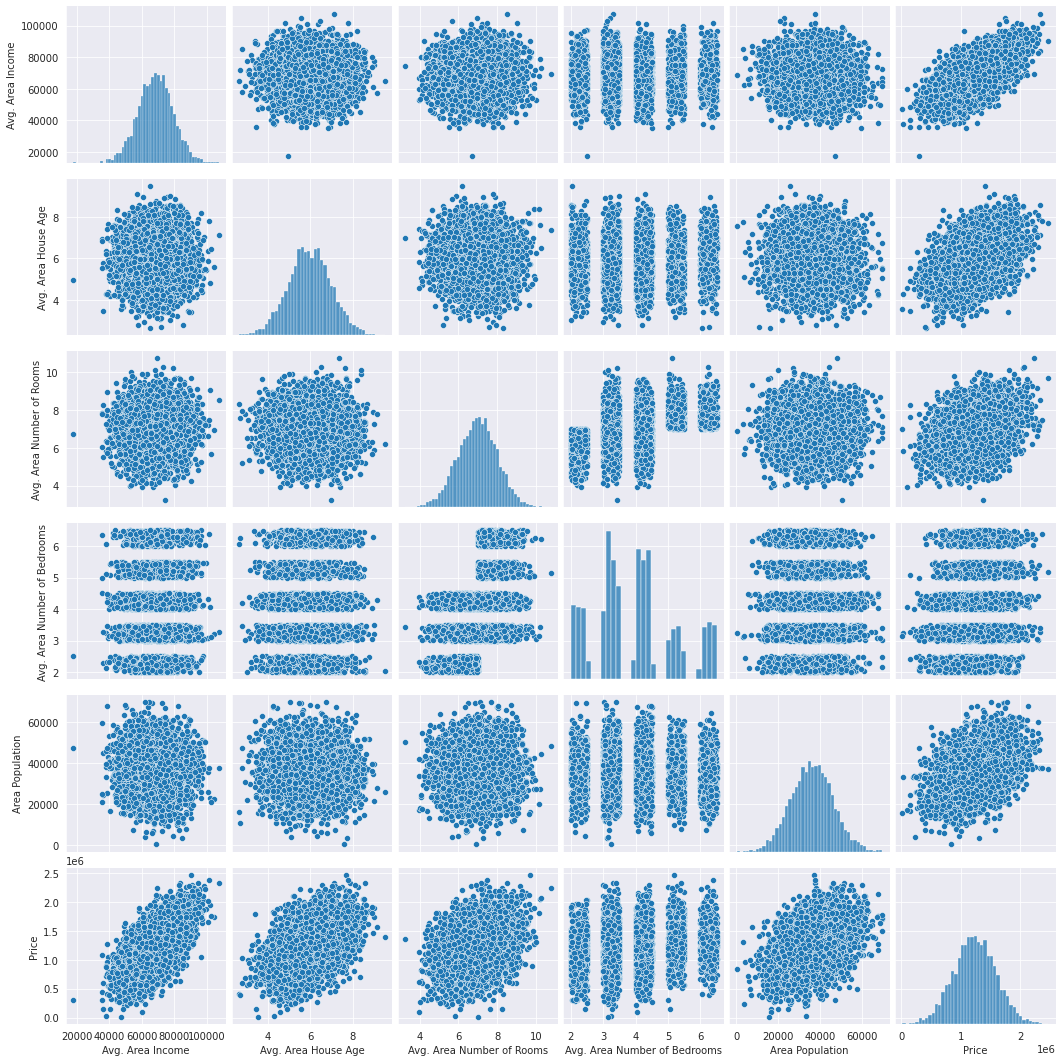

In [10]:
sns.pairplot(data)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

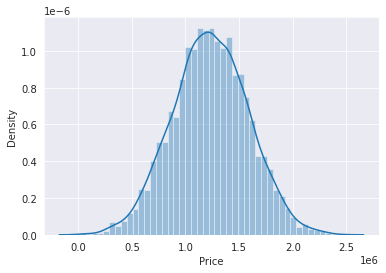

In [11]:
sns.distplot(data['Price'])

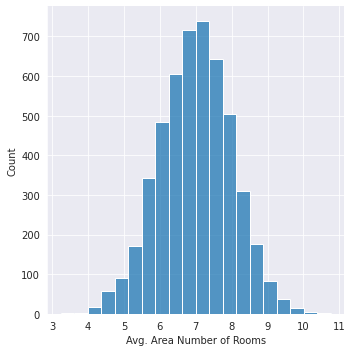

In [12]:
sns.displot(data['Avg. Area Number of Rooms'], kde=False, bins = 20)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg. Area Number of Bedrooms'>

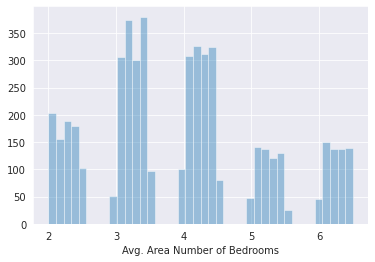

In [13]:
sns.distplot(data['Avg. Area Number of Bedrooms'], kde=False, bins=40)

In [14]:
data['Avg. Area Number of Bedrooms'].value_counts()

4.38    46
3.17    41
3.40    40
3.16    39
3.22    38
        ..
6.31     7
6.01     6
6.02     6
5.42     6
6.42     5
Name: Avg. Area Number of Bedrooms, Length: 255, dtype: int64

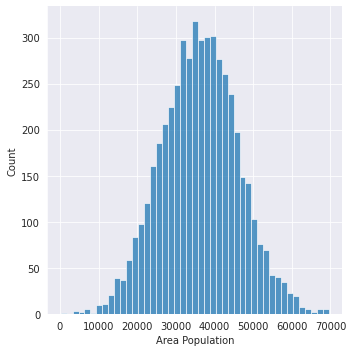

In [15]:
sns.displot(data['Area Population'])

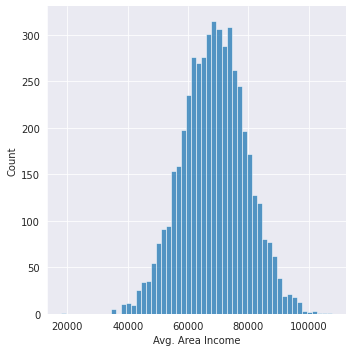

In [16]:
sns.displot(data['Avg. Area Income'])

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Price'>

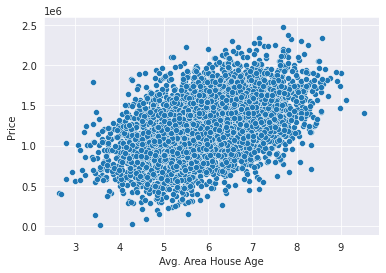

In [17]:
sns.scatterplot(x=data['Avg. Area House Age'], y=data['Price'])

In [18]:
data['Avg. Area House Age'].value_counts()

5.682861    1
7.721909    1
5.866996    1
6.501139    1
6.155403    1
           ..
6.659562    1
5.664971    1
4.656696    1
5.902296    1
5.992305    1
Name: Avg. Area House Age, Length: 5000, dtype: int64

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Area Population'>

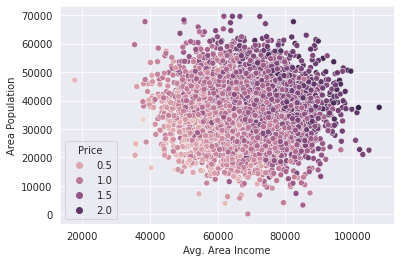

In [19]:
sns.scatterplot(x=data['Avg. Area Income'], y=data['Area Population'], hue=data['Price'])

<AxesSubplot:>

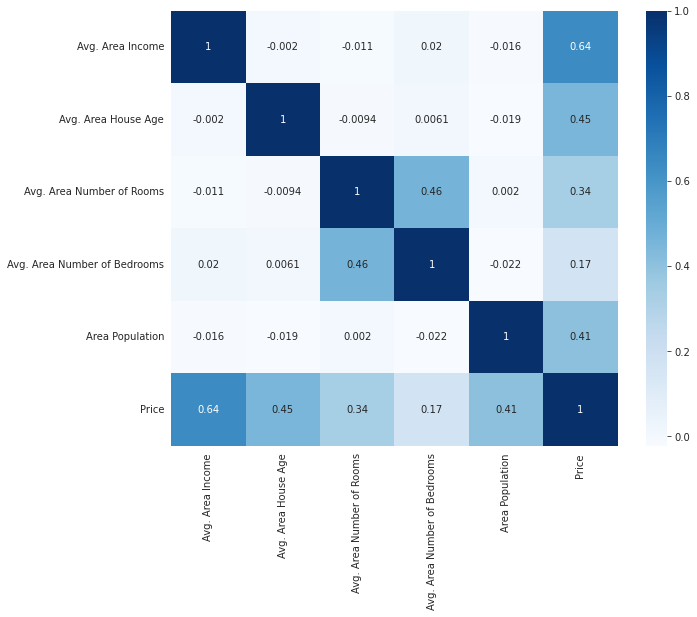

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="Blues")

### **Training a Linear Regression Model**

**Splitting the dataset into X and Y**

In [21]:
X = data.drop(['Price', 'Address'], axis=1)
y = data['Price']

In [22]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [23]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Train and Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE', mae)
    print('MSE', mse)
    print('RMSE', rmse)
    print('R2 square', r2_square)
    print('------------------------------------------')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [27]:
X_train

array([[-1.24020578e+00, -2.02767161e+00,  1.95462007e+00,
         3.23711446e-01,  7.57543586e-01],
       [-5.84004848e-01,  5.24312814e-01,  6.54791707e-01,
        -6.47558147e-01,  1.11053001e+00],
       [ 8.13832570e-01, -5.70507901e-01,  1.24429714e+00,
        -7.12853582e-01, -9.37736647e-01],
       ...,
       [-2.22487078e-01,  5.41698513e-01, -3.69741691e-01,
        -6.88367793e-01,  1.26855496e-01],
       [-9.19631119e-01,  1.43796367e+00,  2.25970126e+00,
         2.74739870e-01,  1.40171401e+00],
       [-6.90243352e-01, -7.64877051e-02,  8.85481254e-01,
         1.67859172e+00,  5.75204193e-04]])

In [28]:
X_test

array([[-0.62100009,  1.05700887, -0.53952948, -0.59858657,  0.78480763],
       [-1.06223374,  0.93110101, -0.06335063, -0.69652972,  0.74840911],
       [ 0.14886022,  0.78131226, -0.31957316, -1.61066581, -0.68539932],
       ...,
       [-0.45762594,  0.76519283,  0.73948173, -0.45167184,  0.80500233],
       [-1.16319792,  0.61119431, -0.02622463,  0.3400353 ,  2.82915341],
       [-0.16868794, -0.50087097,  1.06359827, -0.70469165, -1.23085367]])

### **Linear Regression**

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)


LinearRegression(normalize=True)

### **Model Evaluation**

In [30]:
print(model.intercept_)

1228219.1492415662


In [31]:
print(model.coef_)

[232679.72464304 163841.04659288 121110.55547764   2892.81511895
 151252.34237708]


In [32]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


### **Predictions from our Model**

In [33]:
pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Values')

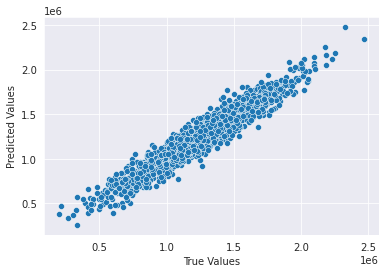

In [34]:
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

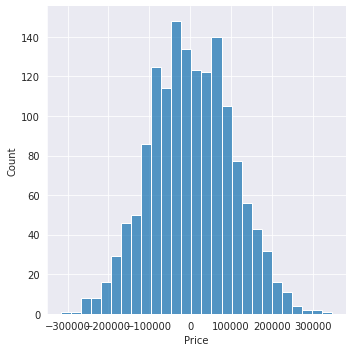

In [35]:
sns.displot(data=(y_test - pred))

### Regression Evaluation Metrics

In [36]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [37]:
print("Test Set Evaluation:\n___________________")
print_evaluate(y_test, test_pred)

print("Train Set Evaluation:\n_____________________")
print_evaluate(y_train, train_pred)

Test Set Evaluation:
___________________
MAE 81135.56609336878
MSE 10068422551.40088
RMSE 100341.52954485436
R2 square 0.9146818498754016
------------------------------------------
Train Set Evaluation:
_____________________
MAE 81480.49973174892
MSE 10287043161.197224
RMSE 101425.06180031257
R2 square 0.9192986579075526
------------------------------------------


In [38]:
results_df = pd.DataFrame(data=[['Linear regression', *evaluate(y_test, test_pred), cross_val(LinearRegression())]],
                         columns = ['Model', 'MAE', 'MSE','RMSE', 'R2 Square', 'Cross Validation'])

In [39]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
